In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('C:/Users/M2-Winterfell/Downloads/submission.csv')
df.head(15)

,filename,xmin,ymin,xmax,ymax,color
0,02880.jpg,264,1012,280,1044,green
1,01093.jpg,1184,860,1204,912,red
2,01093.jpg,1184,868,1204,896,red
3,01093.jpg,1460,864,1476,900,red
4,00938.jpg,1496,1280,1528,1312,green
5,00938.jpg,1508,1284,1524,1316,green
6,00938.jpg,996,1200,1008,1240,green
7,00938.jpg,1508,1296,1524,1316,green
8,00938.jpg,1512,1288,1528,1316,green
9,00938.jpg,1508,1272,1528,1308,green


In [3]:
DIR_INPUT = 'C:/Users/M2-Winterfell/Downloads/archive/'

DIR_IMAGES_TEST = DIR_INPUT + "test_dataset/test_images/"

def plot_img_test(image_name):
    
    fig, ax = plt.subplots(2, 1, figsize = (14, 14))
    ax = ax.flatten()
    
    bbox = df[df['filename'] == image_name]
    img_path = os.path.join(DIR_IMAGES_TEST, image_name)
    
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0
    image2 = image
    
    ax[0].set_title('Original Image')
    ax[0].imshow(image)
    
    for idx, row in bbox.iterrows():
        x1 = row['xmin']
        y1 = row['ymin']
        x2 = row['xmax']
        y2 = row['ymax']
        label = row['color']
        if label == 'red':
            color_brg = (255,0,0)
        elif label == 'green':
            color_brg = (0,255,0)
        elif label == 'yellow':
            color_brg = (0,255,255)
        
        cv2.rectangle(image2, (int(x1),int(y1)), (int(x2),int(y2)), color_brg, 3)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(image2, label, (int(x1),int(y1-10)), font, 1, color_brg, 2)
    
    ax[1].set_title('Image with Bondary Box')
    ax[1].imshow(image2)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


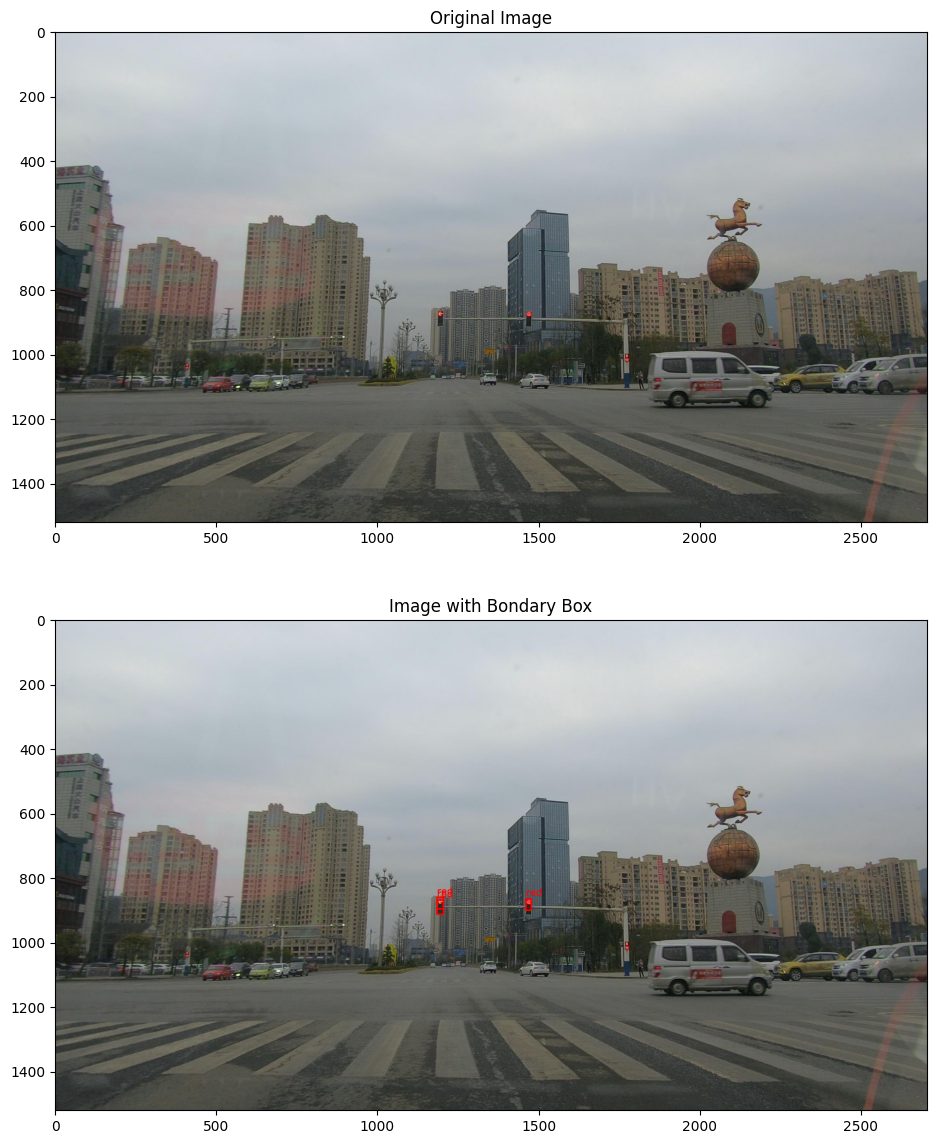

In [7]:
plot_img_test('01093.jpg')